## Project Information

Here, we have to classify colleges into either private or public school, based on the features listed  below. Like it would usually not be in most clustering tasks, the 
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
college = pd.read_csv("College_Data", index_col = 0)

In [4]:
college.head()

#We observe classification already made for the schools in column "Private"

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
#How many entries, features (columns), and null values we dealing with?

college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [6]:
#Of course, if there are certain features of interest, we could already get an insight into their average contribution to the classification of the colleges

college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### Data Feature Engineering

<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

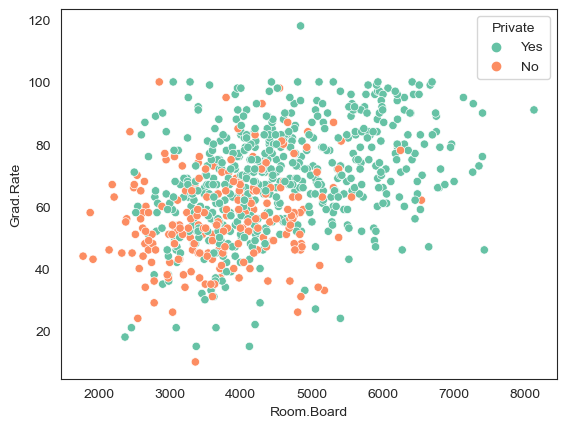

In [7]:
#This is a very flexible part of the data processing, as it could be solely dependent on personal features of interest, depending on the the type of data set or task involved
#Any correlation between the cost of rooms, boards, and the graduation rate?

sns.set_style("white")
sns.scatterplot(x = "Room.Board", y = "Grad.Rate", data = college, hue = "Private", palette = "Set2")

In [8]:
#Interesting observation of higher costs corresponding to higher graduation rates, particularly in private schools

<AxesSubplot:xlabel='F.Undergrad', ylabel='P.Undergrad'>

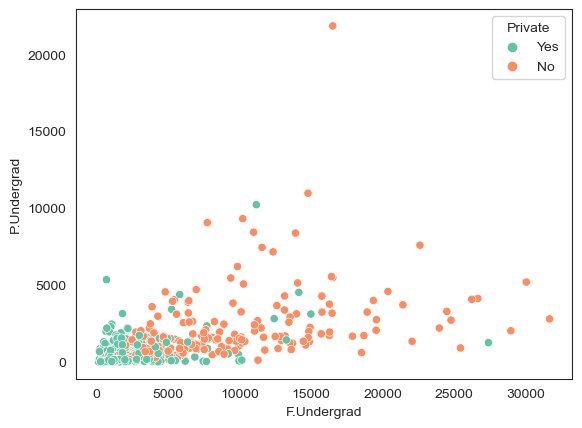

In [9]:
#Correlation between fulltime and parttime undergraduates?

sns.set_style("white")
sns.scatterplot(x = "F.Undergrad", y = "P.Undergrad", data = college, hue = "Private", palette = "Set2")

Text(0.5, 0, 'Outstate')

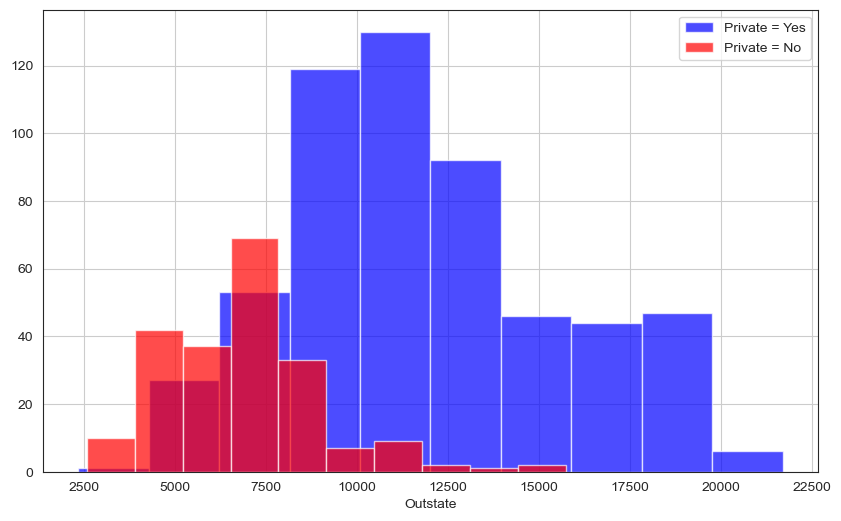

In [10]:
#Difference in out of state tuition between the two schools?

plt.figure(figsize = (10, 6))
college[college["Private"] == "Yes"]["Outstate"].hist(alpha = 0.7, color = "blue", label = "Private = Yes")
college[college["Private"] == "No"]["Outstate"].hist(alpha = 0.7, color = "red", label = "Private = No")
plt.legend()
plt.xlabel("Outstate")

Text(0.5, 0, 'Graduation Rate')

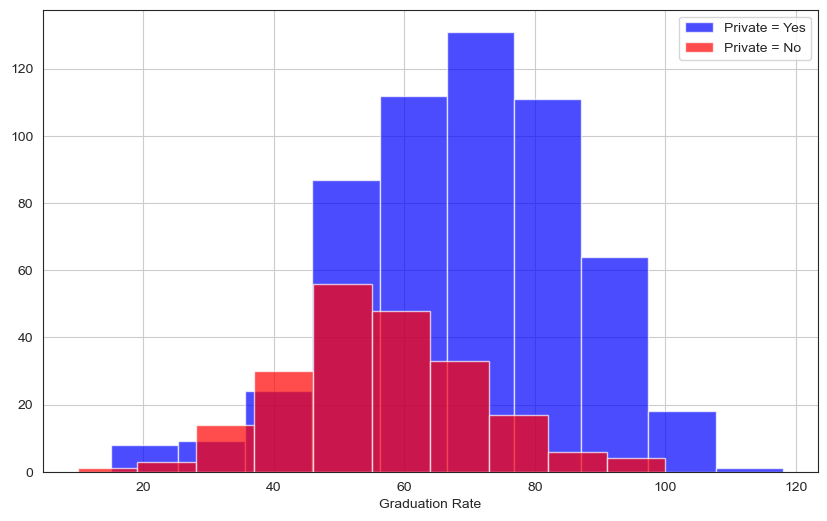

In [11]:
#Difference in graduation rates between the two colleges?

plt.figure(figsize = (10, 6))
college[college["Private"] == "Yes"]["Grad.Rate"].hist(alpha = 0.7, color = "blue", label = "Private = Yes")
college[college["Private"] == "No"]["Grad.Rate"].hist(alpha = 0.7, color = "red", label = "Private = No")
plt.legend()
plt.xlabel("Graduation Rate")

In [12]:
#Higher tuition and graduation rates in private colleges.
#A certain college show a graduation rate over 100%?

In [13]:
college[college["Grad.Rate"] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [14]:
college["Grad.Rate"]["Cazenovia College"] = 100

C:\Users\olayi\AppData\Local\Temp\ipykernel_14124\1744128195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college["Grad.Rate"]["Cazenovia College"] = 100


In [15]:
college[college["Grad.Rate"] > 100].value_counts()

Series([], dtype: int64)

Text(0.5, 0, 'Graduation Rate')

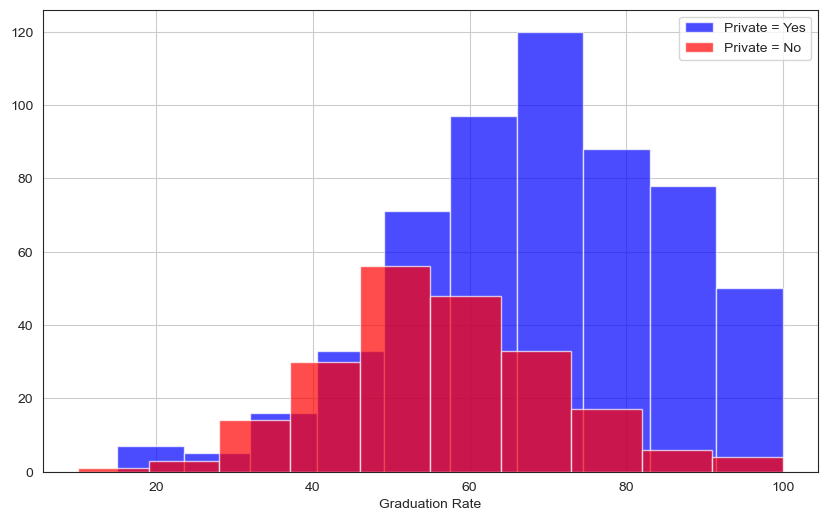

In [16]:
#Reproduce the plot

plt.figure(figsize = (10, 6))
college[college["Private"] == "Yes"]["Grad.Rate"].hist(alpha = 0.7, color = "blue", label = "Private = Yes")
college[college["Private"] == "No"]["Grad.Rate"].hist(alpha = 0.7, color = "red", label = "Private = No")
plt.legend()
plt.xlabel("Graduation Rate")

### Model Development

In [17]:
from sklearn.cluster import KMeans

In [18]:
cluster = KMeans(n_clusters = 2)

In [19]:
cluster.fit(college.drop("Private", axis = 1))

KMeans(n_clusters=2)

In [20]:
cluster.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

### Model Evaluation

In [21]:
label = cluster.labels_

In [22]:
#Since we have a predetermined classification, we can compare our predicted cluster labels to the "original" labels, although this would be impossible in real-life scenarios

In [23]:
def convert(cluster):
    if cluster == "Yes":
        return 1
    else:
        return 0

In [24]:
college["cluster"] = college["Private"].apply(convert)

In [25]:
college["cluster"].head()

Abilene Christian University    1
Adelphi University              1
Adrian College                  1
Agnes Scott College             1
Alaska Pacific University       1
Name: cluster, dtype: int64

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(confusion_matrix(college["cluster"], cluster.labels_))
print("\n")
print(classification_report(college["cluster"], cluster.labels_))

[[ 74 138]
 [ 34 531]]


              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [37]:
 unique = np.unique(label)

In [36]:
college[label == 0]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
Antioch University,Yes,713,661,252,25,44,712,23,15476,3336,400,1100,69,82,11.3,35,42926,48,1
Appalachian State University,No,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70,0
Arizona State University Main campus,No,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48,0
Auburn University-Main Campus,No,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69,0
Baylor University,Yes,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.5,38,7503,72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wake Forest University,Yes,5661,2392,903,75,88,3499,172,13850,4360,500,1250,95,97,4.3,37,41766,89,1
Washington State University,No,6540,5839,2440,31,70,14445,1344,8200,4210,800,2719,84,87,16.9,30,10912,56,0
Washington University,Yes,7654,5259,1254,62,93,4879,1274,18350,5775,768,1512,91,98,3.9,31,45702,90,1
Western Michigan University,No,9167,7191,2738,24,53,15739,4278,6940,4100,500,1700,80,84,24.7,11,5983,55,0


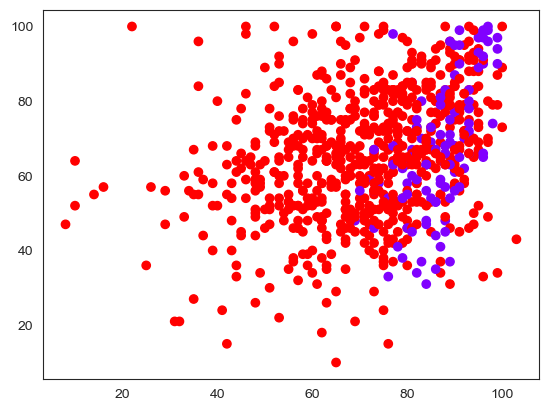

In [50]:
plt.scatter(college["PhD"], college["Grad.Rate"], c = label, cmap = "rainbow")